In [4]:
import numpy as np
import matplotlib 
import matplotlib as mpl
from astropy.stats import LombScargle
from astropy.table import Table
from scipy.signal import savgol_filter
import fitsio

import halophot
from halophot.halo_tools import halo_tpf
import lightkurve 
from lightkurve import TessTargetPixelFile, TessLightCurveFile, TessLightCurve

print(halophot.__version__)

0.6.6.3


In [6]:
%pylab inline --no-import-all
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['figure.figsize']=(10.0,10.0)    #(6.0,4.0)
matplotlib.rcParams['font.size']=22              #10 
matplotlib.rcParams['savefig.dpi']= 300             #72 
colours = mpl.rcParams['axes.prop_cycle'].by_key()['color']

Populating the interactive namespace from numpy and matplotlib


In [7]:
mv /Users/benjaminpope/code/halophot/data/te* ../data/

mv: rename /Users/benjaminpope/code/halophot/data/te* to ../data/te*: No such file or directory


In [27]:
tic = 7222091 # on 2-1 - no dip
tic = 20924063 # 1-1- no dip
tic = 10864081 # on 1-2 - this shows the dip!
tic  = 10879648 # on 1-3 - a bit of a dip?
tic = 10756658 #  1-4 - no dip


In [28]:
fname_lc = lightkurve.search_lightcurvefile(tic)

lc_pipeline = fname_lc.download().get_lightcurve('PDCSAP_FLUX')


In [29]:
fname_tpf = lightkurve.search_targetpixelfile(tic)
tpf = fname_tpf.download()
background = tpf.get_bkg_lightcurve()

In [30]:
# tpf.header

Text(0.5, 1.0, 'TIC 20924063 Background')

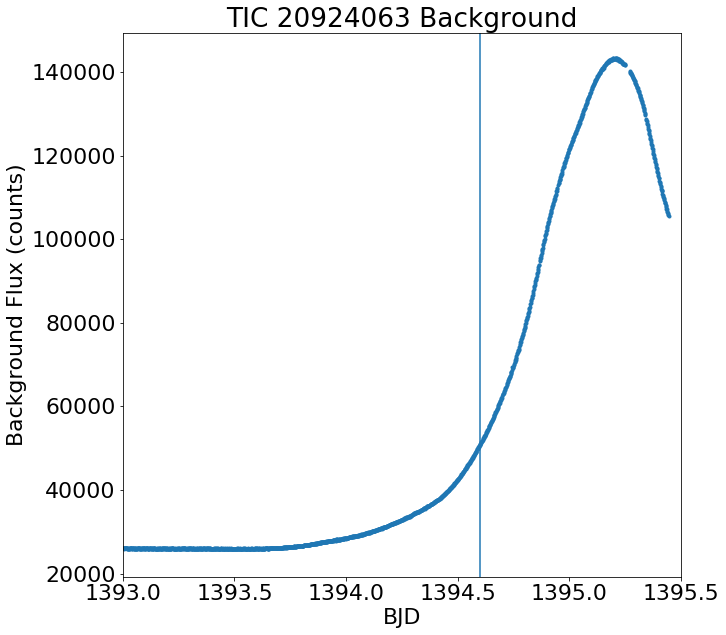

In [31]:
plt.plot(background.time,background.flux,'.')
plt.axvline(1394.6)
plt.xlim(1393,1395.5)
plt.xlabel('BJD')
plt.ylabel('Background Flux (counts)')
plt.title(r'TIC %s Background' % tic)


In [24]:
tpf.interact()